# MOwNiT
## Laboratorium 6 - Wielomiany ortogonalne, zastosowanie do analizy EKG 


## Zadania

In [1]:
using Polynomials, SpecialPolynomials, Plots, LinearAlgebra, CSV, DataFrames, Statistics

### Zadanie 1 (1 pkt)
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

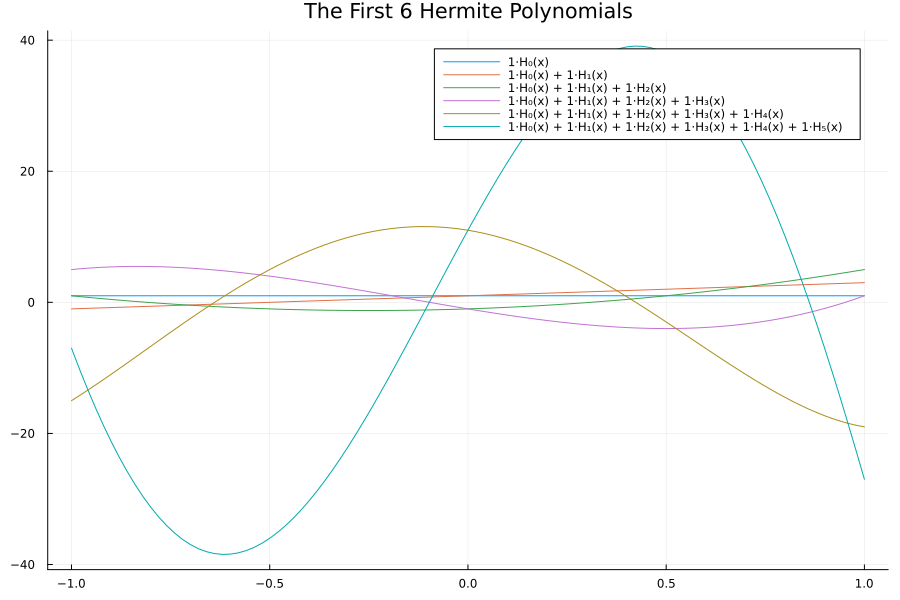

In [2]:
plot(Hermite([1]), -1, 1, size=(900, 600), title="The First 6 Hermite Polynomials")
plot!(Hermite([1, 1]), -1, 1)
plot!(Hermite([1, 1, 1]), -1, 1)
plot!(Hermite([1, 1, 1, 1]), -1, 1)
plot!(Hermite([1, 1, 1, 1, 1]), -1, 1)
plot!(Hermite([1, 1, 1, 1, 1, 1]), -1, 1)

### Zadanie 2  (1 pkt)
Narysować 6 pierwszych funkcji bazowych

In [3]:
b0 = basis(Hermite, 0)
b1 = basis(Hermite, 1)
b2 = basis(Hermite, 2)
b3 = basis(Hermite, 3)
b4 = basis(Hermite, 4)
b5 = basis(Hermite, 5)

Hermite(1.0⋅H₅(x))

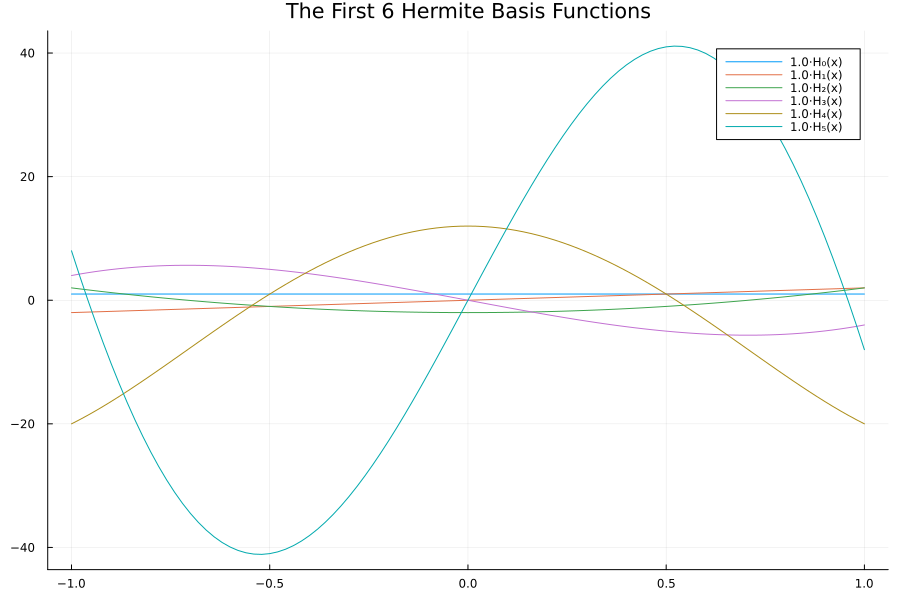

In [4]:
plot(b0, -1 ,1, size=(900, 600), title="The First 6 Hermite Basis Functions")
plot!(b1, -1 ,1)
plot!(b2, -1 ,1)
plot!(b3, -1 ,1)
plot!(b4, -1 ,1)
plot!(b5, -1, 1)

### Zadanie 3  (1 pkt)
Pokazać, że same wielomiany nie są ortogonalne, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [5]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [6]:
xs = -1:0.05:1

f0 = [basis(Hermite, 0)(x) for x in xs]
f1 = [basis(Hermite, 1)(x) for x in xs]
f2 = [basis(Hermite, 2)(x) for x in xs]
f3 = [basis(Hermite, 3)(x) for x in xs]
f4 = [basis(Hermite, 4)(x) for x in xs]
f5 = [basis(Hermite, 5)(x) for x in xs]

fw0 = base_fun(0, xs)
fw1 = base_fun(1, xs)
fw2 = base_fun(2, xs)
fw3 = base_fun(3, xs)
fw4 = base_fun(4, xs)
fw5 = base_fun(5, xs)

xs

-1.0:0.05:1.0

In [7]:
normal = Array{Float64, 2}(undef, 6, 6); 
weighted = Array{Float64, 2}(undef, 6, 6); 

for (i, f_i) in enumerate([f0, f1, f2, f3, f4, f5]) 
    for (j, f_j) in enumerate([f0, f1, f2, f3, f4, f5])
        normal[i, j] = dot(f_i, f_j)
    end
end

for (i, fw_i) in enumerate([fw0, fw1, fw2, fw3, fw4, fw5]) 
    for (j, fw_j) in enumerate([fw0, fw1, fw2, fw3, fw4, fw5])
        weighted[i, j] = dot(fw_i, fw_j)
    end
end

In [8]:
normal

6×6 Matrix{Float64}:
  41.0            -4.44089e-16  …   -52.2668           1.06581e-14
  -4.44089e-16    57.4               -2.13163e-14    986.248
 -24.6            -2.66454e-15     -508.153           -1.77636e-15
   5.32907e-15  -199.867             -1.42109e-14  -4492.91
 -52.2668         -2.13163e-14     4675.31            -1.7053e-13
   1.06581e-14   986.248        …    -1.7053e-13   33274.5

In [9]:
weighted

6×6 Matrix{Float64}:
  1.0           8.16149e-18  -0.652308     …   0.173763     -7.35437e-18
  8.16149e-18   1.0           1.89872e-18     -4.70014e-17   0.780107
 -0.652308      1.89872e-18   1.0             -0.854056     -6.68446e-18
  2.58699e-17  -0.958627     -5.8147e-18       2.30095e-17  -0.925523
  0.173763     -4.70014e-17  -0.854056         1.0          -1.55351e-17
 -7.35437e-18   0.780107     -6.68446e-18  …  -1.55351e-17   1.0

Jak widać, dla wielomianów Hermite'a z funkcją wagową $exp(-x^2)$ baza jest ortonormalna 

### Zadanie 4 (1 pkt)
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

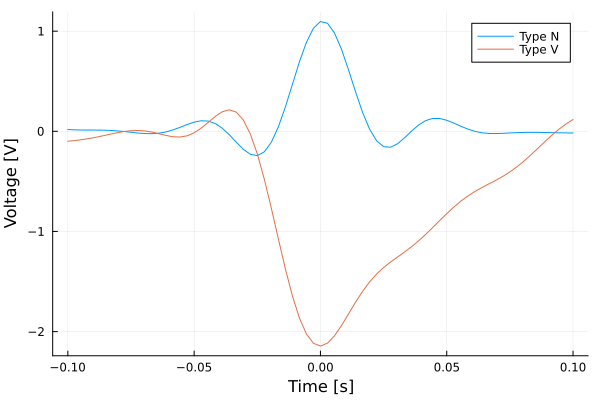

In [10]:
data = CSV.read("ecg_data.csv", DataFrame);

plot(data.time, data.signalN, label="Type N", xlabel = "Time [s]", ylabel="Voltage [V]")
plot!(data.time, data.signalV, label="Type V")

In [11]:
xs = data.time * 40
ys_v = data.signalV
ys_n = data.signalN

length(xs)

73

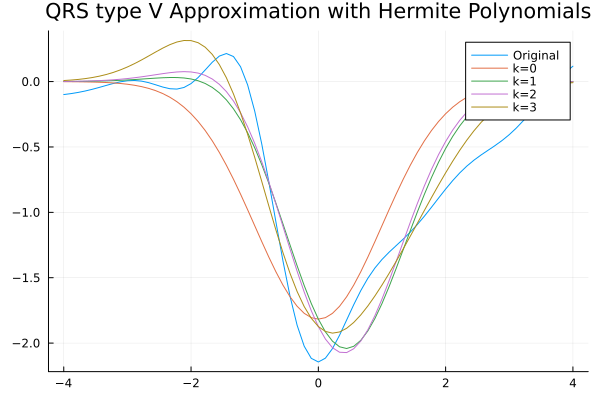

In [12]:
ys0 = base_fun(0, xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)

c0 = dot(ys_v, ys0)
c1 = dot(ys_v, ys1)
c2 = dot(ys_v, ys2)
c3 = dot(ys_v, ys3)

V0 = c0 * ys0
V1 = c1 * ys1
V2 = c2 * ys2
V3 = c3 * ys3

V01 = V0 + V1
V012 = V01 + V2
V0123 = V012 + V3

plot(
    xs, 
    [ys_v, V0, V01, V012, V0123],
    label=["Original" "k=0" "k=1" "k=2" "k=3"],
    title="QRS type V Approximation with Hermite Polynomials"
)

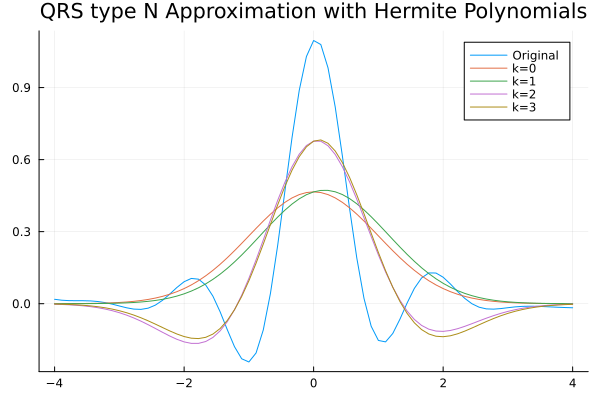

In [13]:
ys0 = base_fun(0, xs)
ys1 = base_fun(1, xs)
ys2 = base_fun(2, xs)
ys3 = base_fun(3, xs)

c0 = dot(ys_n, ys0)
c1 = dot(ys_n, ys1)
c2 = dot(ys_n, ys2)
c3 = dot(ys_n, ys3)

N0 = c0 * ys0
N1 = c1 * ys1
N2 = c2 * ys2
N3 = c3 * ys3

N01 = N0 + N1
N012 = N01 + N2
N0123 = N012 + N3

plot(
    xs, 
    [ys_n, N0, N01, N012, N0123],
    label=["Original" "k=0" "k=1" "k=2" "k=3"],
    title="QRS type N Approximation with Hermite Polynomials"
)


### Zadanie 5  (1 pkt)
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [14]:
mse(y1, y2) = mean((y1 - y2) .^ 2)

mse (generic function with 1 method)

In [15]:
app = [zeros(length(xs)) for _ in 0:20]

for i in 1:11
    y = base_fun(i, xs)
    app[i] = dot(ys_v, y) * y
end

# V01
app[12] = app[1] + app[2]

# V012, ..., V012..10
for i in 3:11
    app[i+10] = app[i] + app[i+9]
end

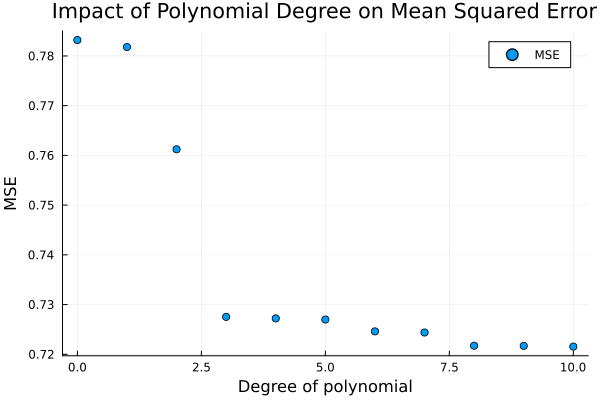

In [16]:
mses = [0.0 for _ in 1:11]

# V0
mses[1] = mse(ys_v, app[1])

# V01, ..., V012..10
for i in 12:21
    mses[i-10] = mse(ys_v, app[i])
end

scatter( 
    0:1:10,
    mses,
    xlabel="Degree of polynomial",
    ylabel="MSE",
    label="MSE",
    title="Impact of Polynomial Degree on Mean Squared Error"
)